# Настройка ноутбука

In [30]:
import numpy as np
import pandas as pd
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Описание

## Основная идея

```terminal
1) Собираем данные
2) Определить как распределены данные 
3) Зная распределение, мы можем уверено утверждать и опровергать гипотезы
```

До того как что либо произошло, мы можем говорить лишь о вероятности того или иного исхода. Распределение вероятности описывает наше предположение о вероятности всех исходов исходя из опыта (собранных данных).  

Каждое распределение вероятностей илюстрируется графиком Функции Плотности Распределения (ФПР).


**Видео:**
- [StatQuest: Quantile-Quantile Plots (QQ plots), Clearly Explained!!!](https://www.youtube.com/watch?v=okjYjClSjOg)
- [3Blue1Brown - Binomial distributions | Probabilities of probabilities, part 1](https://www.youtube.com/watch?v=8idr1WZ1A7Q&t=576s&ab_channel=3Blue1Brown)

**Статьи:**
- [Medium: Bernoulli and Binomial Random Variables with Python](https://towardsdatascience.com/bernoulli-and-binomial-random-variables-d0698288dd36)
- [Хабр: Типичные распределения вероятностей, шпаргалка data scientist-а](https://habr.com/ru/post/331060/)

# Генерация случайных величин с заданым распределением

<img src="../data/img/distributions.png" width="650">

# Функции распределений

[MathProfi: Непрерывная случайная величина и её функция распределения. Функция плотности распределения
](http://mathprofi.ru/nepreryvnaya_sluchaynaya_velichina.html)

**Функция плотности вероятности (Probability Density Function, PDF)** - показывает вероятность попадания случайной величины в конкретный диапазон значений
<img src="../data/img/probability_density_function.png" width="300">

Вероятность - это плошадь под кривой.

**Кумулятивная функции распределения (Cumulutive Density Function, CDF)** - показывает вероятность того, что случайная величина меньше указанного значения либо равно ему. Она доступна только для количественных целевых значений
<img src="../data/img/cumulative_density_function.png" width="300">

In [70]:
mean = 0
std = 3

norm = st.norm(mean, std)
values = pd.Series(norm.rvs(10000))

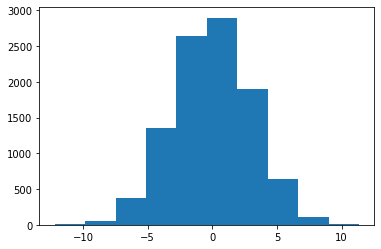

In [76]:
n, bins, patches = plt.hist(values, density=False, bins=10);

In [77]:
print(f'''
\nn: {n}
\nsum(n): {sum(n)}
\nbins: {bins}
''')



n: [   9.   54.  373. 1353. 2648. 2898. 1898.  639.  115.   13.]

sum(n): 10000.0

bins: [-12.18507113  -9.83129755  -7.47752397  -5.12375039  -2.76997681
  -0.41620323   1.93757036   4.29134394   6.64511752   8.9988911
  11.35266468]



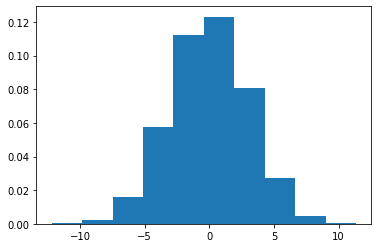

In [74]:
n, bins, patches = plt.hist(values, density=True, bins=10);

In [75]:
print(f'''
\nn: {n}
\nsum(n): {sum(n)}
\nbins: {bins}
''')



n: [0.00038236 0.00229419 0.01584689 0.05748216 0.1125002  0.12312144
 0.08063647 0.0271479  0.00488577 0.0005523 ]

sum(n): 0.4248497000342857

bins: [-12.18507113  -9.83129755  -7.47752397  -5.12375039  -2.76997681
  -0.41620323   1.93757036   4.29134394   6.64511752   8.9988911
  11.35266468]



Как выяснилось n - это высоты bin-ов, и в сумме они не дают (и не должны давать) единицу. Вот если посчитать площадь всех столбиков и сложить, то получится единица.

### Как получить площадь столбиков графика?

###### variant 1

In [66]:
obs_areas = []

for start, end, n_val in zip(bins[:-1], bins[1:], n):
    area = (end-start)*n_val
    obs_areas.append(area)
    
print(f'''
len: {len(obs_areas)}
sum: {sum(obs_areas)}
''')


len: 30
sum: 0.9999999999999998



#### variant 2

In [67]:
areas = n * np.diff(bins)
print(f'''
len: {len(areas)}
sum: {sum(areas)}
''')


len: 30
sum: 0.9999999999999998



## Распределение Бернулли

**Функция плотности:**
<img src="../data/img/bernoulli_probability_mass_function.png" width="350">

**Пример из реальности:**
- бросок (возможно "неправильной") монетки

Вероятность значения 1: 0.3
Вероятность значения 0: 0.7
 


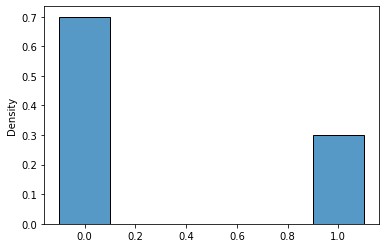

In [9]:
from scipy.stats import bernoulli, binom

p = 0.3
X = st.bernoulli(p)

# .pmf - Probability Mass Function - посчитать значение из функции плотности

print(f'Вероятность значения 1: {np.round(X.pmf(1),2)}')
print(f'Вероятность значения 0: {np.round(X.pmf(0), 2)}', end='\n \n')

X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

**Среднее значение и стандартное отклонение:**
<img src="../data/img/bernoulli_mean_std_deviation.png" width="400">

**Функция плотности:**
<img src="../data/img/bernoulli_probability_mass_function.png" width="400">

**Пример из реальности:**
- бросок (возможно "неправильной") монетки

In [10]:
print('Empirically calculated mean: {}'.format(X_samples.mean()))
print('Theoretical mean: {}'.format(p), end='\n \n')

print('Empirically calculated standard deviation: {}'.format(X_samples.std()))
print('Theoretical standard deviation: {}'.format((p*(1-p))**(1/2)))

Empirically calculated mean: 0.3001
Theoretical mean: 0.3
 
Empirically calculated standard deviation: 0.4583012000857079
Theoretical standard deviation: 0.458257569495584


## Равномерное распределение

- [Mathprofi: Равномерное распределение вероятностей](http://mathprofi.ru/ravnomernoe_raspredelenie_veroyatnostei.html)



**Функция плотности:**

**Примеры из реальности:**
- бросок "правильного" игрального кубика

In [11]:
n_outcomes = 6
n_samples = 30

X_samples = np.array(sum([[i]*(n_samples//n_outcomes) for i in range(n_outcomes)], []))
print(f'X_samples: {X_samples}')

X_samples: [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]


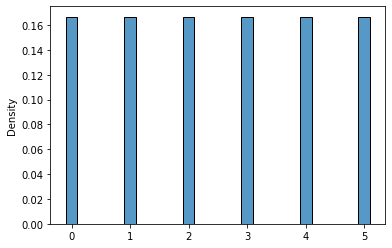

In [12]:
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

In [13]:
print('Empirically calculated mean: {}'.format(X_samples.mean()))
print('Theoretical mean: {}'.format(sum(X_samples)/len(X_samples)), end='\n \n')

Empirically calculated mean: 2.5
Theoretical mean: 2.5
 


In [14]:
print('Empirically calculated standard deviation: {}'.format(X_samples.std()))
# print('Theoretical standard deviation: {}'.format((p*(1-p))**(1/2)))

Empirically calculated standard deviation: 1.707825127659933


## Биноминальное распределение 

- [The Binomial Distribution and Test, Clearly Explained!!!](https://www.youtube.com/watch?v=J8jNoF-K8E8)


    - распределение суммы исходов тех вещей, которые следуют распределению Бернулли
**Функция плотности:**
<img src="../data/img/benominall_probability_mass_function.png" width="300">


**Примеры из реальности:**
- Сумма выпавших орлов после подбрасывания "правильной монеты". 
- Количество белых шаров, после вытаскивания с возварщением из урны с одинаковым количеством белых и черных шаров

In [15]:
n=6
p = 0.3
Y = st.bernoulli(p)

In [16]:
Y_samples = [Y.rvs(1000000) for i in range(6)]
Z_samples = sum(Y_samples)

print(f"Y: {Y_samples}", end='\n \n')
print(f"Z: {Z_samples}", Z_samples)

Y: [array([0, 0, 0, ..., 0, 0, 1]), array([0, 0, 1, ..., 0, 0, 1]), array([0, 0, 1, ..., 0, 1, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 1, 0, 0]), array([1, 0, 0, ..., 0, 0, 0])]
 
Z: [1 0 2 ... 1 1 2] [1 0 2 ... 1 1 2]


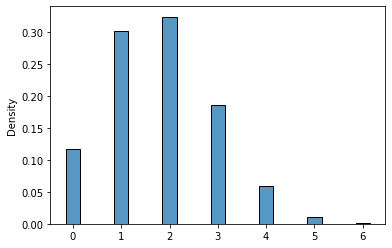

In [17]:
sns.histplot(Z_samples, stat="density", discrete=True, shrink=0.3);

In [18]:
print('Empirically calculated expected value: {}'.format(Z_samples.mean()))
print('Theoretical expected value: {}'.format(n*p), end='\n \n')

print('Empirically calculated variance: {}'.format(Z_samples.var()))
print('Theoretical variance: {}'.format(n*p*(1-p)))

Empirically calculated expected value: 1.800757
Theoretical expected value: 1.7999999999999998
 
Empirically calculated variance: 1.2612212269510001
Theoretical variance: 1.2599999999999998


## Геометрическое распределение



**Функция плотности:**
<img src="../data/img/geometric_probability_mass_function.png" width="300">

**Примеры из реальности:**
- Количество белых шаров, после вытаскивания без возварщения из урны с одинаковым количеством белых и черных шаров

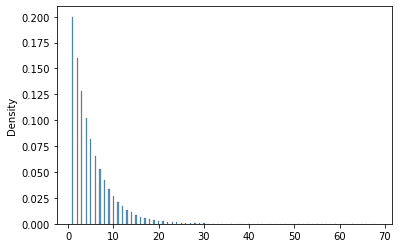

In [19]:
p=0.2
X = np.random.geometric(p, 1000000)

sns.histplot(X, stat="density", discrete=True, shrink=0.3);

In [20]:
print('Theoretical expected value: ' + str(X.mean()))
print('Empirically calculated expected value: ' + str(1/p))

Theoretical expected value: 4.997749
Empirically calculated expected value: 5.0


## Распределение Пуассона

    – распределение Бернулли при переходе на бесконечность
    – то, о чём надо вспоминать, когда идёт речь о подсчёте событий за определённое время при постоянной заданной интенсивности.

**Примеры из реальности:**
- Количество звонков в чат поддержки в единицу времени

Одно полезное свойство распределения Пуассона заключается в том, что его параметр равен его математическому ожиданию.

При увеличении параметра $\lambda повышается вероятность принятия случайной переменной б**о**льших значений

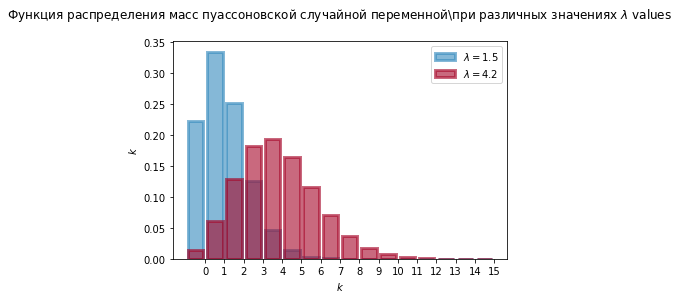

In [21]:
a = np.arange(16)
poi = st.poisson

lambda_ = [1.5, 4.25]
colors = ["#348ABD", "#A60628"]


plt.bar(a, poi.pmf(a, lambda_[0]), color=[colors[0]],
       label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
       edgecolor=colors[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=[colors[1]],
       label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
       edgecolor=colors[1], lw="3")

plt.xticks(a + 0.5, a)
plt.legend()
plt.ylabel(u"$k$")
plt.xlabel(u"$k$")
plt.title(u"Функция распределения масс пуассоновской случайной переменной\при различных значениях $\lambda$ values \n");

## Нормальное распределение

- [The Normal Distribution, Clearly Explained!!!](https://www.youtube.com/watch?v=rzFX5NWojp0&ab_channel=StatQuestwithJoshStarmer)

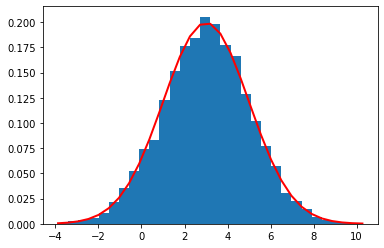

In [24]:
m = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение

# Сгенерим нашу генеральную совокупность
s = np.random.normal(m, sigma, 10000) # сренерируем набор случайных чисел, с нормальных распределением. 

count, bins, ignored = plt.hist(s, 30, density=True) # нарисуем график функции плотности случайной величины

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - m)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

## Логистическое распределение

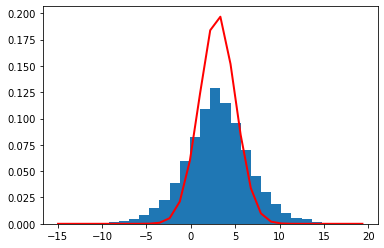

In [26]:
m = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение


s = np.random.logistic(m, sigma, 10000)

count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - m)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

## Экспоненциальное распределение

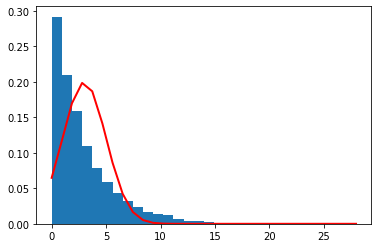

In [27]:
m = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение


s = np.random.exponential(m, 10000)

count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - m)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

## Распределение Парето

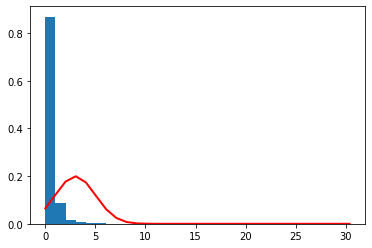

In [28]:
m = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение


s = np.random.pareto(m, 10000)

count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - m)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()